<a href="https://colab.research.google.com/github/DebjitHore/TensorflowDeveloperUdemy/blob/main/02_NNClassificationTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

Form of the data : [batch_size, width, height, color_channels]

♐ Resource : [Andrej Karpathy NN training advice](http://karpathy.github.io/2019/04/25/recipe/)

 ## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

#Make 1000 samples
n_samples= 1000

# Create circles
X,y= make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
#Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
#Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
len(X), len(y)


(1000, 1000)

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [8]:
circles= pd.DataFrame({"X0": X[:, 0], "X1":X[:,1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


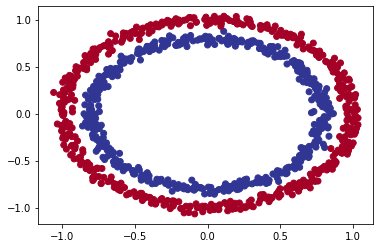

In [9]:
plt.scatter(X[:,0], X[:,1], c=y, cmap= plt.cm.RdYlBu)

[Tensorflow Playground ](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.79703&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

## Steps in Modelling a Classification NN

* Create/import model
* Compile the model
* Fit the model
* Evaluate the model
* Tweak
*Evaluate

In [10]:
model_1= tf.keras.Sequential([
                              tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ['accuracy'])

model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 4s 3ms/step - loss: 6.1925 - accuracy: 0.4880
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 6.0433 - accuracy: 0.4910
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 5.6098 - accuracy: 0.4770
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.6907 - accuracy: 0.4460
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.1582 - accuracy: 0.4770


In [11]:
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7933 - accuracy: 0.4790


[7.793267250061035, 0.4790000021457672]

* Model has 50% accuracy so it is effectively guessing in a Binary Classification problem

In [12]:
model_2= tf.keras.Sequential([
                              tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ['accuracy'])

model_2.fit(X,y, epochs=100, verbose=0)
model_2.evaluate(X,y)


32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

## Improving our model


In [13]:
tf.random.set_seed(42)
model_3= tf.keras.Sequential([
                              tf.keras.layers.Dense(100),
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

model_3.fit(X,y, epochs=250, verbose=0)
model_3.evaluate(X,y)


32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5310


[0.6934202313423157, 0.531000018119812]

## Visualising Results

* To pinpoint why the prediction algorithm is not upto mark.
* We will plot the decision boundary.
* Take trained model, create meshgrid of different X values, make predictions across the meshgrid, and plot predictions as well as a line between the zones (where each unique class falls)

In [14]:
import numpy as np

def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classifcation...


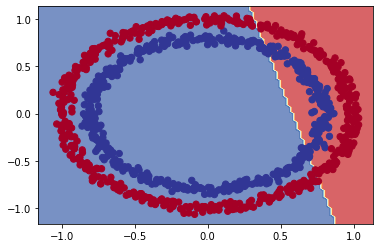

In [15]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

Resource : https://github.com/GokuMohandas/Made-With-ML


## Adding non-linearity to NN for Binary Classfication

In [16]:
tf.random.set_seed(42)
model_4= tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation='relu'),
                              tf.keras.layers.Dense(4, activation=None),
                              tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

model_4.fit(X,y, epochs=250, verbose=0)
model_4.evaluate(X,y)


32/32 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.9850


[0.07175487279891968, 0.9850000143051147]

doing binary classifcation...


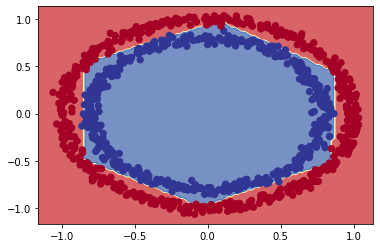

In [17]:
plot_decision_boundary(model=model_4, X=X,y=y)

## Evaluating and Improving our classification algorithm.

In [18]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, y_test.shape

((800, 2), (200,))

In [20]:
tf.random.set_seed(42)
model_5= tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation='relu'),
                              tf.keras.layers.Dense(4, activation=None),
                              tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics= ['accuracy'])



In [21]:
history= model_5.fit(X_train, y_train, epochs=25, verbose=0)
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1211 - accuracy: 0.9750


[0.12109675258398056, 0.9750000238418579]

doing binary classifcation...
doing binary classifcation...


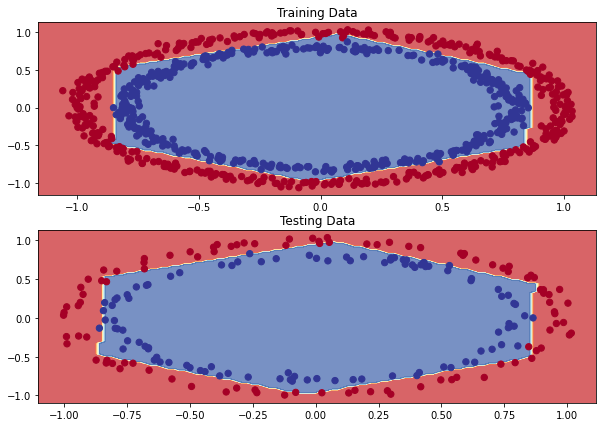

In [22]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.title("Training Data")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(2,1,2)
plt.title("Testing Data")
plot_decision_boundary(model_4, X_test, y_test)

Text(0.5, 1.0, 'Model Loss Curves')

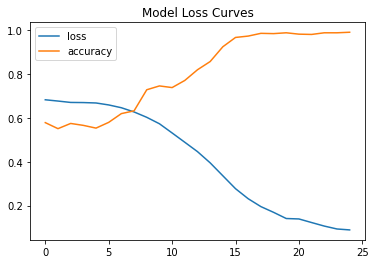

In [23]:
pd.DataFrame(history.history).plot()  
plt.title("Model Loss Curves")

## Using callback to find ideal model learning rate

* A learning rate callback. (Callback is an added functionality to add your model **while** it is training.
* A modified loss curve plot.

In [24]:
tf.random.set_seed(42)

model_6= tf.keras.Sequential([
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

In [25]:
from gc import callbacks
history_2= model_6.fit(X_train,
                       y_train,
                       epochs=100,
                       callbacks=[lr_scheduler])  

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

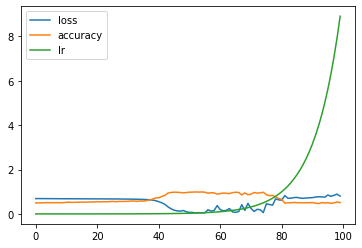

In [26]:
pd.DataFrame(history_2.history).plot()

Text(0, 0.5, 'Loss')

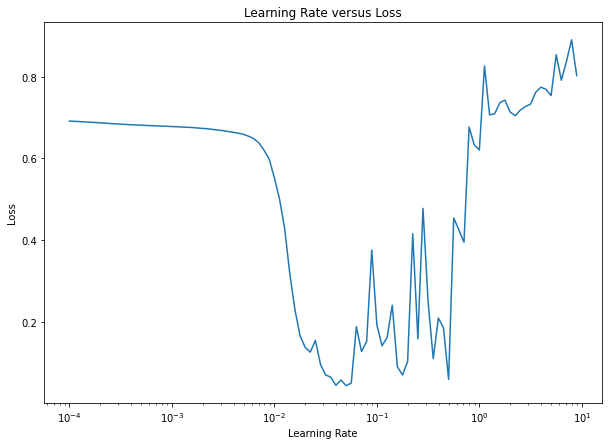

In [27]:
# Plot learning rate versus the loss

lrs= (1e-4*10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_2.history['loss'])
plt.title('Learning Rate versus Loss')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

The ideal learning rate will be between the lowest point on the curve and about 10 times smaller than that.

doing binary classifcation...
doing binary classifcation...


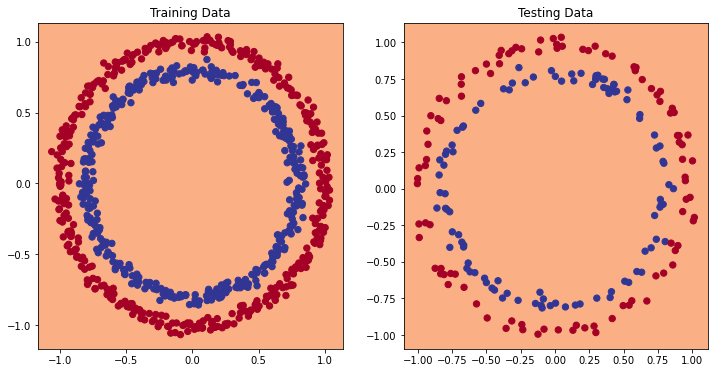

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training Data")
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundary(model_6, X_test, y_test)

## Classification algorithm Evaluation methods

* Accuracy is not the best metric for imbalance classes.
* Precision- for imbalance classes. (higher precision leads to less false positives
* Recall - for imbalance classes. (higher recall leads to less false negatives)
* Precision, Recall trade-off.
* F1 score- combination of precision and recall, usually a good metric for a classification model
* Confusion matrix- Comparing predictions to truth labels to see where model gets most confused. Can be hard to use with larger number of classes.

In [29]:
tf.random.set_seed(42)

model_7= tf.keras.Sequential([
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history= model_7.fit(X_train, y_train, epochs=350, verbose=0)

In [30]:
loss, accuracy= model_7.evaluate(X_test, y_test)
print(f"Model loss on the test set :{loss}")
print(f"Model accuracy on the test set :{accuracy*100:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.1014 - accuracy: 0.9800
Model loss on the test set :0.10140041261911392
Model accuracy on the test set :98.00%


### Confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
tf.random.set_seed(42)

model_8= tf.keras.Sequential([
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history= model_8.fit(X_train, y_train, epochs=350, verbose=0)
y_pred= model_8.predict(X_test) #y_pred needs to be made into a binary vector


In [33]:
y_pred= y_pred.round()

In [34]:
confusionMatrix= confusion_matrix(y_test, y_pred)
confusionMatrix

array([[97,  3],
       [ 1, 99]])

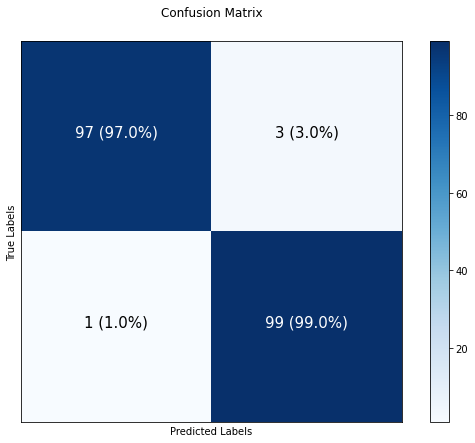

In [35]:
import itertools

figsize= (10, 7)

#Create confusion matrix

cm= confusion_matrix(y_test, y_pred)
cm_norm= cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

n_classes= cm.shape[0]

#plot
fig, ax= plt.subplots(figsize=figsize)
cax= ax.matshow(cm, cmap= plt.cm.Blues)
fig.colorbar(cax)

classes= False

if classes:
  labels= classes
else:
  labels= np.arange(cm.shape[0])

ax.set(title='Confusion Matrix',
       xlabel='Predicted Labels',
       ylabel= 'True Labels',
       xticks= np.arange(classes),
       yticks=np.arange(classes),
       xticklabels= labels,
       yticklabels= labels)
threshold= (cm.max()+cm.min())/2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Working with a larger example (multiclass classification)

* More than two classes.
* Fashion MNIST dataset.


In [36]:
from tensorflow.keras.datasets import fashion_mnist

#Data is split already into training and test datasets

(train_data, train_labels), (test_data, test_labels)= fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [37]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [38]:
train_labels[0]

9

In [39]:
# Check shape of single example
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

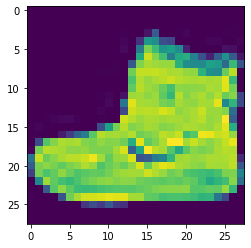

In [40]:
plt.imshow(train_data[0])

In [41]:
# Create a list or dictionary to make labels readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

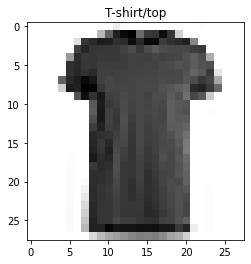

In [42]:
plt.imshow( train_data[17],cmap = plt.cm.binary)
plt.title(class_names[train_labels[17]])

## Building a multi-class classification model

* Input shape needs to be added. (28x28)
* Ouput layer shape (10)
* Output ativation - softmax.
* Loss function= tf.keras.losses.CategoricalCrossentrpy()
    * If labels are one-hot encoding, use CategoricalCrossentropy()
    * If labels are integer form use SparseCategoricalCrossentropy()

In [44]:
tf.random.set_seed(42)

model_9= tf.keras.Sequential([
                            
                            tf.keras.layers.Flatten(input_shape=(28,28)),
                            #tf.keras.Input(shape=(None, 784)),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(10, activation='softmax'),
])

model_9.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history= model_9.fit(train_data, train_labels, epochs=10, validation_data= (test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.3638 - accuracy: 0.1605 - val_loss: 1.7673 - val_accuracy: 0.2121
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6660 - accuracy: 0.2839 - val_loss: 1.5776 - val_accuracy: 0.3319
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4313 - accuracy: 0.4019 - val_loss: 1.3069 - val_accuracy: 0.4467
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3064 - accuracy: 0.4415 - val_loss: 1.2609 - val_accuracy: 0.4538
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2987 - accuracy: 0.4439 - val_loss: 1.2606 - val_accuracy: 0.4492
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2645 - accuracy: 0.4520 - val_loss: 1.2469 - val_accuracy: 0.4551
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2579 - accuracy: 0.4548 - val_loss: 1.2841 - val_accuracy

In [45]:
model_9.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.1916 - accuracy: 0.4822


[1.1916019916534424, 0.4821999967098236]

## Improving performance of the Neural Network with normalisation.

* Neural Networks prefer data to be scaled (or normalised), this means input should be between 0 and 1

In [46]:
train_data_norm, test_data_norm= train_data/255.0, test_data/255.0

In [47]:
tf.random.set_seed(42)

model_9= tf.keras.Sequential([
                            
                            tf.keras.layers.Flatten(input_shape=(28,28)),
                            #tf.keras.Input(shape=(None, 784)),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(10, activation='softmax'),
])

model_9.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history= model_9.fit(train_data_norm, train_labels, epochs=25, validation_data= (test_data_norm, test_labels))


Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7175 - accuracy: 0.7461 - val_loss: 0.5048 - val_accuracy: 0.8237
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4600 - accuracy: 0.8387 - val_loss: 0.5208 - val_accuracy: 0.8253
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4300 - accuracy: 0.8481 - val_loss: 0.4625 - val_accuracy: 0.8366
Epoch 4/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4134 - accuracy: 0.8551 - val_loss: 0.4497 - val_accuracy: 0.8394
Epoch 5/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4029 - accuracy: 0.8580 - val_loss: 0.4701 - val_accuracy: 0.8359
Epoch 6/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3948 - accuracy: 0.8602 - val_loss: 0.4585 - val_accuracy: 0.8366
Epoch 7/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3883 - accuracy: 0.8632 - val_loss: 0.4507 - val_accuracy:

## Finding the ideal learning rate.

In [48]:
tf.random.set_seed(42)

model_10= tf.keras.Sequential([
                            
                            tf.keras.layers.Flatten(input_shape=(28,28)),
                            #tf.keras.Input(shape=(None, 784)),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(10, activation='softmax'),
])

model_10.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3*10**(epoch/20))
fitlr_history= model_10.fit(train_data_norm, train_labels, epochs=40,  validation_data= (test_data_norm, test_labels), callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7175 - accuracy: 0.7461 - val_loss: 0.5048 - val_accuracy: 0.8237 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4618 - accuracy: 0.8375 - val_loss: 0.5205 - val_accuracy: 0.8259 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4323 - accuracy: 0.8471 - val_loss: 0.4621 - val_accuracy: 0.8354 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4179 - accuracy: 0.8526 - val_loss: 0.4592 - val_accuracy: 0.8369 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4092 - accuracy: 0.8558 - val_loss: 0.4612 - val_accuracy: 0.8378 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4031 - accuracy: 0.8571 - val_loss: 0.4684 - val_accuracy: 0.8313 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0, 0.5, 'Loss')

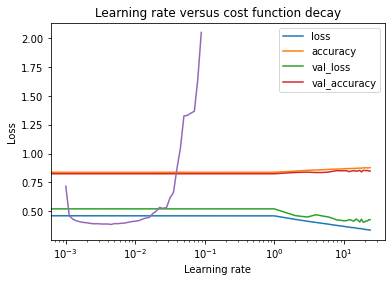

In [49]:
# Plot the loss decay curve wrt epochs

pd.DataFrame(history.history).plot()
plt.title("Loss Function Decay vs Epochs")
plt.xlabel("Epochs")
plt.ylabel('Loss function')
#Plot learning rate loss decay curve

lrs= 1e-3*10**(tf.range(40)/20)
plt.semilogx(lrs, fitlr_history.history['loss'])
plt.title("Learning rate versus cost function decay")
plt.xlabel("Learning rate")
plt.ylabel('Loss')

## Evaluating our multi-class classification model

In [50]:
test_pred_labels= model_9.predict(test_data_norm)
test_pred_labels[:5]

array([[2.5496205e-09, 8.7120872e-10, 3.8623725e-08, 5.2081472e-08,
        3.4078800e-09, 3.4563433e-02, 2.0238263e-06, 1.0361581e-01,
        1.3259376e-05, 8.6180544e-01],
       [4.8745071e-05, 7.7337425e-10, 9.7162187e-01, 3.9970819e-06,
        6.2073017e-03, 1.7770766e-18, 2.2117890e-02, 6.8693235e-19,
        6.1328194e-08, 5.2549670e-21],
       [5.7952229e-07, 9.9997556e-01, 3.1576664e-07, 2.2429726e-05,
        4.4244757e-07, 1.0071994e-08, 6.6948411e-07, 6.1126660e-21,
        9.7856738e-13, 3.2961089e-17],
       [1.1667952e-07, 9.9996853e-01, 4.4148113e-08, 2.6981734e-05,
        2.6996119e-07, 1.2199669e-06, 2.7628055e-06, 4.0423483e-17,
        4.0845049e-12, 4.9862962e-13],
       [2.4969572e-01, 4.4859898e-05, 6.2045861e-02, 1.1139554e-02,
        1.0798392e-02, 1.4493489e-09, 6.6532999e-01, 1.4859891e-11,
        9.4564341e-04, 4.8090731e-10]], dtype=float32)

In [51]:
y_preds= test_pred_labels.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 0, 1, 5])

In [52]:
confusion_matrix(y_preds, test_labels)

array([[837,   0,  27,  21,   0,   0, 174,   0,   7,   0],
       [  8, 969,   9,  20,   2,   0,   3,   0,   1,   1],
       [ 10,   1, 792,   8, 169,   0, 123,   0,   9,   0],
       [ 67,  25,  23, 906,  67,   1,  48,   0,  17,   1],
       [  2,   1,  65,  16, 634,   0,  42,   0,   4,   0],
       [  0,   0,   1,   0,   0, 949,   0,  28,   4,  14],
       [ 67,   3,  80,  25, 126,   0, 598,   0,  26,   1],
       [  0,   0,   0,   0,   0,  31,   0, 933,   4,  36],
       [  9,   1,   3,   4,   2,   2,  12,   0, 926,   1],
       [  0,   0,   0,   0,   0,  17,   0,  39,   2, 946]])

All the major values are on the confusion matrix diagonal.

In [53]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

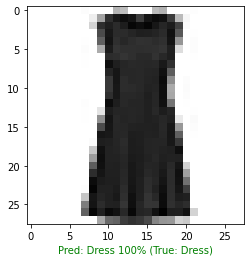

In [54]:
# Check out a random image as well as its prediction
plot_random_image(model=model_9, 
                  images=test_data, 
  
                  true_labels=test_labels, 
                  classes=class_names)

In [55]:
model_9.layers

In [56]:
weights, biases= model_9.layers[1].get_weights()

weights, weights.shape

(array([[ 0.02861048,  0.48201555, -0.8037576 , ..., -0.44086492,
          0.10423699,  0.15855075],
        [-0.43656805, -0.7299167 , -0.5339075 , ..., -0.7439353 ,
          0.9352585 ,  0.23215303],
        [-0.43422598, -0.60263336, -1.0462041 , ..., -1.0644257 ,
          0.8927661 , -0.50373787],
        ...,
        [ 0.12866703, -0.78099513, -0.0818727 , ...,  0.0975619 ,
          0.21054569, -0.00729959],
        [-0.07144851, -0.66941196, -0.5707761 , ...,  0.8899899 ,
         -0.06881469,  0.16514306],
        [ 0.31068128, -0.6529007 , -0.06622917, ...,  0.00422111,
          0.17792024, -0.23388837]], dtype=float32), (784, 10))

In [57]:
biases, biases.shape

(array([ 1.682598  ,  0.5499173 ,  0.16547   ,  1.1582503 ,  0.47466487,
         0.68963224,  0.21882318,  0.09013239,  0.5170284 , -0.42056412],
       dtype=float32), (10,))

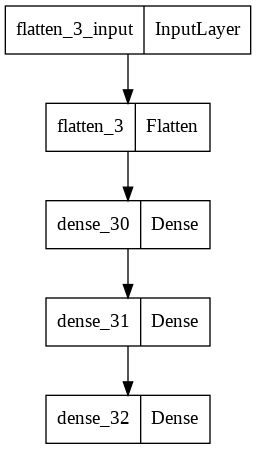

In [58]:
from tensorflow.keras.utils import plot_model

plot_model(model_10)